### Exploratory Data Analysis using Numpy, Scipy, Pandas, Matplotlib

In [61]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 


### Analytics Objective : Based on Historical advertising data, discover the causal relationship of advertisement with Sales and  recommend the marketing plan to result in high Product sales.


In [14]:
# read data from local disk
sales_data = pd.read_csv('C:\\Users\\jp\\python_ML_training\\Advertising.csv')
sales_data.head()

,TV,Radio,Newspaper,Area,Sales
0,230.1,37.8,69.2,suburban,22.1
1,44.5,39.3,45.1,rural,10.4
2,17.2,45.9,69.3,rural,9.3
3,151.5,41.3,58.5,suburban,18.5
4,180.8,10.8,58.4,suburban,12.9


### Predictors or Features or dependent Variable
- TV : advertising budgets(in thousands of dollars) spent on TV ads for a single product in a market.
- Radio : advertising budgets(in thousands of dollars) spent on Radio ads.
- Newspaper : advertising budgets(in thousands of dollars) spent on Newspaper ads.

### Response or Independent Variable
- Sales : Sales of a single product in a given market (in thousands units)

In [7]:
sales_data.shape  # 200 markets ads data and related sales

(200, 4)

In [44]:
# list all the attributes of the dataframe
sales_data.columns  # will show the list of all columns

Index(['TV', 'Radio', 'Newspaper', 'Area', 'Sales'], dtype='object')

In [36]:
# dtype will provides the data types of each attributes
sales_data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Area          object
Sales        float64
dtype: object

### Data Cleaning steps

In [18]:
sales_data

,TV,Radio,Newspaper,Area,Sales
0,230.1,37.8,69.2,suburban,22.1
1,44.5,39.3,45.1,rural,10.4
2,17.2,45.9,69.3,rural,9.3
3,151.5,41.3,58.5,suburban,18.5
4,180.8,10.8,58.4,suburban,12.9
5,8.7,48.9,75.0,rural,7.2
6,57.5,32.8,NaN,urban,11.8
7,120.2,19.6,11.6,suburban,13.2
8,8.6,NaN,1.0,rural,4.8
9,199.8,2.6,21.2,rural,10.6


In [17]:
# List out all the columns having any missing values
sales_data.isnull().sum()

TV           0
Radio        2
Newspaper    2
Area         0
Sales        0
dtype: int64

In [19]:
# list out all the rows  having missing values
nan_rows = sales_data[sales_data.isnull().T.any().T]  
nan_rows

,TV,Radio,Newspaper,Area,Sales
6,57.5,32.8,NaN,urban,11.8
8,8.6,NaN,1.0,rural,4.8
10,66.1,5.8,NaN,rural,8.6
21,237.4,NaN,23.5,suburban,12.5


In [23]:
# Missing imputation - drop or impute with estimated values
sales_data.Radio

# sales_data = sales_data.dropna()  # drop the rows having missing values

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
5      48.9
6      32.8
7      19.6
8       NaN
9       2.6
10      5.8
11     24.0
12     35.1
13      7.6
14     32.9
15     47.7
16     36.6
17     39.6
18     20.5
19     23.9
20     27.7
21      NaN
22     15.9
23     16.9
24     12.6
25      3.5
26     29.3
27     16.7
28     27.1
29     16.0
       ... 
170    11.6
171    20.9
172    20.1
173     7.1
174     3.4
175    48.9
176    30.2
177     7.8
178     2.3
179    10.0
180     2.6
181     5.4
182     5.7
183    43.0
184    21.3
185    45.1
186     2.1
187    28.7
188    13.9
189    12.1
190    41.1
191    10.8
192     4.1
193    42.0
194    35.6
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, dtype: float64

In [28]:
# impute the missing values with mean

# calculate the mean
Radio_mean = np.mean(sales_data.Radio)

# Replace missing values with the mean
sales_data.Radio = sales_data.Radio.fillna(Radio_mean)

Newspaper_mean = np.mean(sales_data.Newspaper)
sales_data.Newspaper = sales_data.Newspaper.fillna(Newspaper_mean)

In [27]:
sales_data.Radio

0      37.800000
1      39.300000
2      45.900000
3      41.300000
4      10.800000
5      48.900000
6      32.800000
7      19.600000
8      23.462626
9       2.600000
10      5.800000
11     24.000000
12     35.100000
13      7.600000
14     32.900000
15     47.700000
16     36.600000
17     39.600000
18     20.500000
19     23.900000
20     27.700000
21     23.462626
22     15.900000
23     16.900000
24     12.600000
25      3.500000
26     29.300000
27     16.700000
28     27.100000
29     16.000000
         ...    
170    11.600000
171    20.900000
172    20.100000
173     7.100000
174     3.400000
175    48.900000
176    30.200000
177     7.800000
178     2.300000
179    10.000000
180     2.600000
181     5.400000
182     5.700000
183    43.000000
184    21.300000
185    45.100000
186     2.100000
187    28.700000
188    13.900000
189    12.100000
190    41.100000
191    10.800000
192     4.100000
193    42.000000
194    35.600000
195     3.700000
196     4.900000
197     9.3000

In [37]:
# Summarising each attributes. - Measure of Central Tendency (Mean, Median, Mode)
sales_data.TV.mean()  # average TV Advertisement expense

149.6355

In [40]:
# Summarising each attributes. - Measure of Dispersion (Range, Variance, Standard Dev, IQR)
sales_data.TV.std()  # Standard Deviation of TV Advertisement expense

97.03586494268951

In [41]:
# Summarising each attributes.
sales_data.Radio.mean()  # average Radio Advertisement expense

23.46262626262629

In [42]:
# describe the summary statistics of quantitative attributes
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,149.635500,23.462626,30.621717,14.022500
std,97.035865,14.713250,21.768115,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,10.475000,12.750000,10.375000
50%,149.750000,23.462626,26.300000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,800.000000,49.600000,114.000000,27.000000


In [43]:
# for categorical attributes, need to pass specifically the 'object' in the describe method
sales_data.describe(include=['object'])

,Area
count,200
unique,3
top,rural
freq,95


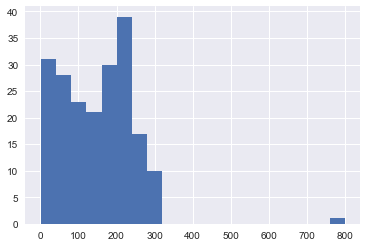

In [49]:
# Exploratory Visualization  :  Matplotlib is a core package for visualization. Seaborn is extension of matplotlib to make griphic look nicer.

# Histogram - graphical represenation of frequency distribution : 
# Observations are organized into bins, and plotted with values along the X-axis and number of observations in each bin alng y-axis.
sales_data.TV.hist(bins=20)  

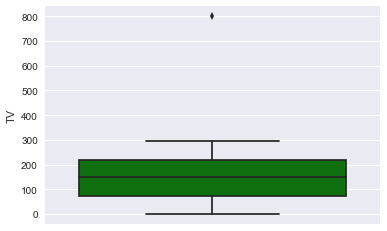

In [53]:
# Box plot to find outliers
sns.boxplot(sales_data.TV, color = "green", orient = "v")

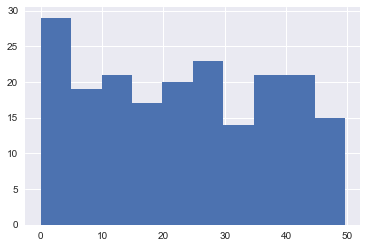

In [51]:
sales_data.Radio.hist(bins=10)  

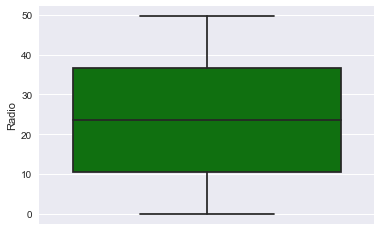

In [54]:
sns.boxplot(sales_data.Radio, color = "green", orient = "v")

In [55]:
# Categorical data 
sales_data.Area.unique()

array(['suburban', 'rural', 'urban'], dtype=object)

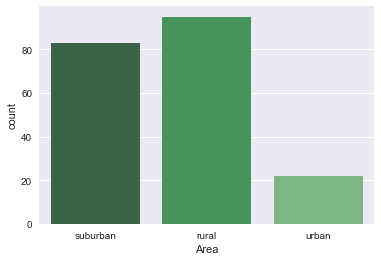

In [65]:
# Fequency Bar plot
sns.countplot(x="Area", data=sales_data, palette="Greens_d");


### Scatter plot to visulize the realtionship between differrent ads and sales.

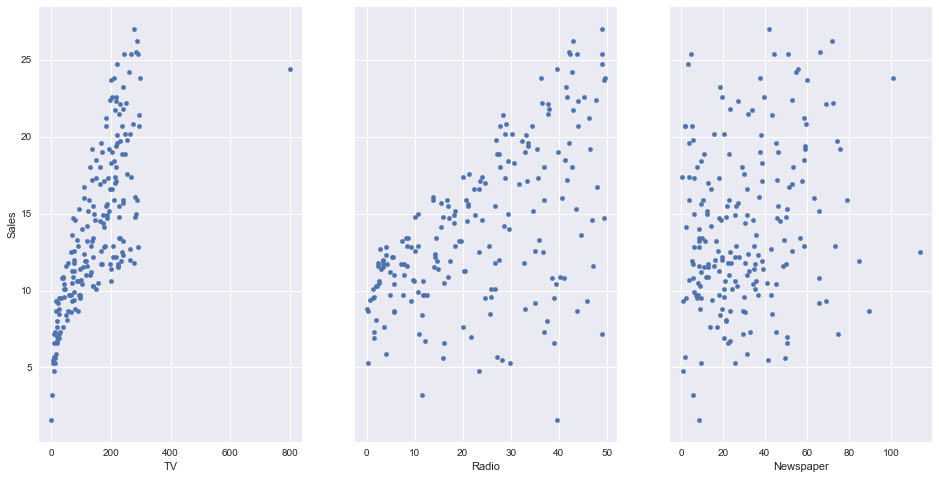

In [66]:
# Bi Variate analysis ( Numerical - Numerical)

fig, axs = plt.subplots(1, 3, sharey=True)
sales_data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
sales_data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
sales_data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [94]:
sales_data.corr(method='pearson')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.073819,0.078454,0.745504
Radio,0.073819,1.000000,0.344816,0.566726
Newspaper,0.078454,0.344816,1.000000,0.226168
Sales,0.745504,0.566726,0.226168,1.000000


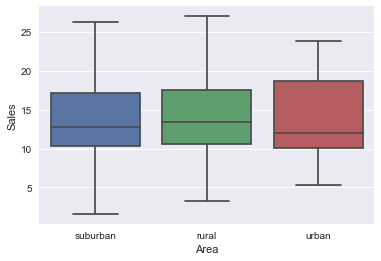

In [67]:
# Categorical - Numerical
sns.boxplot(x="Area", y="Sales", data=sales_data);

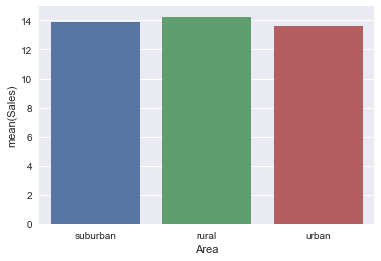

In [69]:
# Categorical - Numerical
sns.barplot(x="Area", y="Sales", data=sales_data, ci=None);

In [72]:
#renaming the colum names 
sales_data.rename(columns = {'Area' : 'AreaName'})

,TV,Radio,Newspaper,AreaName,Sales
0,230.1,37.800000,69.200000,suburban,22.1
1,44.5,39.300000,45.100000,rural,10.4
2,17.2,45.900000,69.300000,rural,9.3
3,151.5,41.300000,58.500000,suburban,18.5
4,180.8,10.800000,58.400000,suburban,12.9
5,8.7,48.900000,75.000000,rural,7.2
6,57.5,32.800000,30.621717,urban,11.8
7,120.2,19.600000,11.600000,suburban,13.2
8,8.6,23.462626,1.000000,rural,4.8
9,199.8,2.600000,21.200000,rural,10.6


In [74]:
# select the Panda series from a DataFrame
sales_data['Sales'] # basic way to selecting a series from panda is using bracket 
# sales_data.Sales

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
5       7.2
6      11.8
7      13.2
8       4.8
9      10.6
10      8.6
11     17.4
12      9.2
13      9.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     12.5
22      5.6
23     15.5
24      9.7
25     12.0
26     15.0
27     15.9
28     18.9
29     10.5
       ... 
170     8.4
171    14.5
172     7.6
173    11.7
174    11.5
175    27.0
176    20.2
177    11.7
178    11.8
179    12.6
180    10.5
181    12.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    15.9
189     6.7
190    10.8
191     9.9
192     5.9
193    19.6
194    17.3
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, dtype: float64

In [78]:
# sorting by column
sales_data.sort_values('Radio', ascending=True)


,TV,Radio,Newspaper,Area,Sales
127,80.2,0.0,9.2,suburban,8.8
107,90.4,0.3,23.2,suburban,8.7
108,13.1,0.4,25.6,urban,5.3
117,76.4,0.8,14.8,suburban,9.4
157,149.8,1.3,24.3,urban,10.1
34,95.7,1.4,7.4,rural,9.5
91,28.6,1.5,33.0,urban,7.3
32,97.2,1.5,30.0,rural,9.6
76,27.5,1.6,20.7,suburban,6.9
145,140.3,1.9,9.0,suburban,10.3


In [86]:
# filtering a row from a panda data frame 

# Single Filter - list out all the records where TV advertisement expese > 250
sales_data[sales_data.TV > 250]


,TV,Radio,Newspaper,Area,Sales
17,800.0,39.6,55.8,rural,24.4
25,262.9,3.5,19.5,rural,12.0
30,292.9,28.3,43.2,rural,21.4
33,265.6,20.0,0.3,rural,17.4
35,290.7,4.1,8.5,rural,12.8
36,266.9,43.8,5.0,rural,25.4
42,293.6,27.7,1.8,rural,20.7
54,262.7,28.8,15.9,rural,20.2
61,261.3,42.7,54.7,suburban,24.2
93,250.9,36.5,72.3,suburban,22.2


In [87]:
# Mulitple Filter - list out all the records where TV advertisement expese > 250 and area='rural'
sales_data[(sales_data.TV > 250) & (sales_data.Area == 'rural')]

,TV,Radio,Newspaper,Area,Sales
17,800.0,39.6,55.8,rural,24.4
25,262.9,3.5,19.5,rural,12.0
30,292.9,28.3,43.2,rural,21.4
33,265.6,20.0,0.3,rural,17.4
35,290.7,4.1,8.5,rural,12.8
36,266.9,43.8,5.0,rural,25.4
42,293.6,27.7,1.8,rural,20.7
54,262.7,28.8,15.9,rural,20.2
98,289.7,42.3,51.2,rural,25.4
102,280.2,10.1,21.4,rural,14.8


In [88]:
# Mulitple Filter - list out all the records where TV advertisement expese > 250 or area='rural'
sales_data[(sales_data.TV > 250) | (sales_data.Area == 'rural')]

,TV,Radio,Newspaper,Area,Sales
1,44.5,39.300000,45.100000,rural,10.4
2,17.2,45.900000,69.300000,rural,9.3
5,8.7,48.900000,75.000000,rural,7.2
8,8.6,23.462626,1.000000,rural,4.8
9,199.8,2.600000,21.200000,rural,10.6
10,66.1,5.800000,30.621717,rural,8.6
12,23.8,35.100000,65.900000,rural,9.2
13,97.5,7.600000,7.200000,rural,9.7
14,204.1,32.900000,46.000000,rural,19.0
16,67.8,36.600000,114.000000,rural,12.5


In [92]:
# Using group by in Pandas

# get the average Sales for each Areas
sales_data.groupby('Area').Sales.mean()

Area
rural       14.255789
suburban    13.869880
urban       13.590909
Name: Sales, dtype: float64

In [93]:
# get the averages for each columns for each Areas
sales_data.groupby('Area').mean()

,TV,Radio,Newspaper,Sales
Area,,,,
rural,161.178947,24.217501,30.576018,14.255789
suburban,141.684337,22.540514,29.998795,13.869880
urban,129.786364,23.681818,33.169169,13.590909


In [90]:
# get the sales txn frequency for each Areas
sales_data.groupby('Area').Sales.count()

Area
rural       95
suburban    83
urban       22
Name: Sales, dtype: int64

In [12]:
# writing the file into disk
sales_data.to_csv('Advertising_1.csv', index=False)